In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data_smart.csv', sep = ';', encoding = 'utf-8',engine='c')


df

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal
0,30-03-2022T21:26:49,73.0,92.26,27.90,0,50
1,29-03-2022T17:33:22,76.6,91.01,25.90,0,50
2,28-03-2022T18:15:21,92.2,83.98,25.32,0,50
3,29-03-2022T17:29:21,76.0,83.81,25.93,0,50
4,01-04-2022T10:30:14,88.0,8.57,20.40,1,50
...,...,...,...,...,...,...
373,28-03-2022T18:22:21,95.0,47.00,23.30,0,50
374,28-03-2022T18:26:21,95.0,48.00,23.50,0,50
375,28-03-2022T18:21:21,95.0,50.00,23.45,0,50
376,28-03-2022T18:20:21,95.0,50.00,23.60,0,50


In [3]:
from pycaret.classification import *
s = setup(df, target = 'Liga')

,Description,Value
0,session_id,5512
1,Target,Liga
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(378, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best = compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9850,0.9948,0.9857,0.9625,0.9723,0.9621,0.9637,0.0080
ridge,Ridge Classifier,0.9850,0.0000,0.9857,0.9607,0.9724,0.9621,0.9629,0.0040
dt,Decision Tree Classifier,0.9848,0.9805,0.9714,0.9750,0.9713,0.9609,0.9627,0.0040
lightgbm,Light Gradient Boosting Machine,0.9848,0.9948,0.9857,0.9625,0.9723,0.9618,0.9635,0.0680
lda,Linear Discriminant Analysis,0.9813,0.9777,0.9714,0.9583,0.9636,0.9511,0.9522,0.0040
rf,Random Forest Classifier,0.9812,0.9941,0.9714,0.9607,0.9647,0.9519,0.9532,0.0470
ada,Ada Boost Classifier,0.9811,0.9944,0.9714,0.9607,0.9647,0.9518,0.9530,0.0180
gbc,Gradient Boosting Classifier,0.9774,0.9921,0.9714,0.9482,0.9580,0.9426,0.9442,0.0140
lr,Logistic Regression,0.9739,0.9906,0.9429,0.9583,0.9482,0.9309,0.9329,0.2840
et,Extra Trees Classifier,0.9587,0.9840,0.9143,0.9321,0.9195,0.8918,0.8949,0.0380


In [4]:
print(best)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6654, verbose=0,
                       warm_start=False)


In [5]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

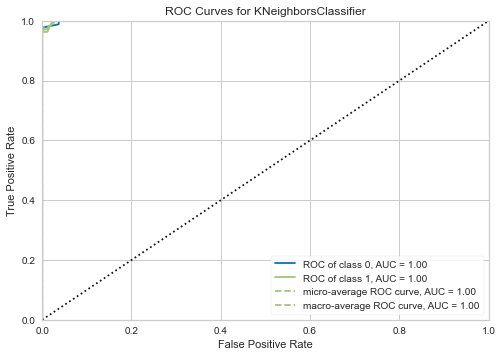

In [6]:
plot_model(best, plot = 'auc')



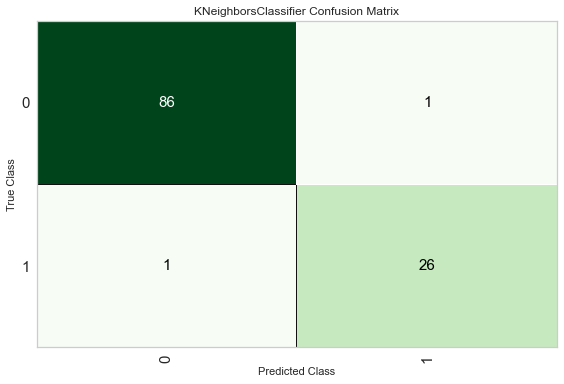

In [7]:
plot_model(best, plot = 'confusion_matrix')



In [8]:
predict_model(best)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9375,1.0000,1.0000,0.8000,0.8889,0.8462,0.8563


,umidadeSolo,temperaturaAmbiente,umidadeAmbiente,umidadeIdeal_50,Liga,Label,Score
0,52.0,12.0,78.0,1.0,0,0,0.60
1,66.0,40.0,38.0,1.0,0,0,0.95
2,10.0,5.0,56.0,1.0,1,1,0.86
3,60.0,12.0,29.0,1.0,0,0,0.96
4,5.0,43.0,2.0,1.0,1,1,0.88
5,47.0,45.0,72.0,1.0,0,1,0.72
6,79.0,7.0,58.0,1.0,0,0,0.99
7,40.0,11.0,41.0,1.0,1,1,0.86
8,63.0,10.0,20.0,1.0,0,0,1.00
9,8.0,16.0,66.0,1.0,1,1,0.93


In [8]:
predictions = predict_model(best, data=df)
predictions.head()

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal,Label,Score
0,30-03-2022T21:26:49,73.0,92.26,27.90,0,50,0,1.0
1,29-03-2022T17:33:22,76.6,91.01,25.90,0,50,0,1.0
2,28-03-2022T18:15:21,92.2,83.98,25.32,0,50,0,1.0
3,29-03-2022T17:29:21,76.0,83.81,25.93,0,50,0,1.0
4,01-04-2022T10:30:14,88.0,8.57,20.40,1,50,1,0.8


In [9]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal,Label,Score_0,Score_1
0,30-03-2022T21:26:49,73.0,92.26,27.90,0,50,0,1.0,0.0
1,29-03-2022T17:33:22,76.6,91.01,25.90,0,50,0,1.0,0.0
2,28-03-2022T18:15:21,92.2,83.98,25.32,0,50,0,1.0,0.0
3,29-03-2022T17:29:21,76.0,83.81,25.93,0,50,0,1.0,0.0
4,01-04-2022T10:30:14,88.0,8.57,20.40,1,50,1,0.2,0.8
